# Public versus Private Funding of Education: Growth vs. Inequality

Author: [Timothy Kam](https://github.com/phantomachine) | [Twitter](https://twitter.com/machinafantasma)




**Key Learning Points - Economics**

* Optimal saving and consumption

* General (Walrasian) Equilibrium (in OLG setting) - as a Recursive Equilibrium Map

* Cross-sectional heterogeneity in wealth

* Dynamics of wealth inequality

* Education and tax policy

**Key Learning Points - Skills**


* Recursive maps: Difference equation system, Boundary value problem

* Python:

    * Loops, conditional statements, NumPy arrays, Defining custom functions (``def``)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm, lognorm

In [2]:
%matplotlib inline

# MOTIVATION

## Data

Let's look at some observed data

* Source: https://ourworldindata.org/income-inequality

**Empirical observation 1**
    
* *Income inequality* in English-speaking countries follow a *U shape*: rising since late 1970s

* In continental Europe and Japan, it follows more of an *L shape*: fall and remains roughly constant since 1950s

<a href="https://ourworldindata.org/uploads/2018/07/Top-Incomes.png" target="_blank"><img src="figures/topincomes.png" width=800px/></a>


**Empirical observation 2**

* In all countries there is *less inequality* after redistributive taxes and transfers

* But ... reductions in inequality vary between countries

* Substantial cross-country heterogeneity in inequality remains after redistribution

<a href="https://ourworldindata.org/uploads/2013/12/inequality-of-incomes-before-and-after-taxes-and-transfers.png" target="_blank"><img src="figures/inequality-of-incomes-before-and-after-taxes-and-transfers.png" width=800px/></a>

# SIMPLE MODEL: ENDOGENOUS GROWTH AND INEQUALITY

## A structure for interpretation and narrative

Now let's try to (qualitatively) rationalize some of the facts using a simple model (a *parable* if you will)

* Abstract from many factors and details

* Focus on the role of Human Capital accumulation as a driver for endogenous growth (like in Lucas, 1988)

* But how Human Capital investment financing is done matters for inequality

More advanced work may allow us to also explain these facts more accurately or quantitatively

Why overlapping generations (OLG) growth model?

* Useful starting point to think about *optimal consumption/saving* behavior in a *general equilibrium* setting

* A model with a natural notion of *heterogeneity*:

    * Heterogeneity implies individual-level differences in marginal propensities to consumption, hence potentially heterogeneous response to public policy
    
    * Useful for thinking about inequality, redistributive and intergenerational policies (e.g., pensions, education, environment, demographic change, aging and healthcare)
    
* **This week**: Example on public education policy and long run wealth inequality vs. growth

## Agenda

So far ...
    
* A simple OLG setup due to [Peter Diamond](https://en.wikipedia.org/wiki/Peter_Diamond) ...

* Diamond, in turn, built on [Paul Samuelson's exact consumption-loan model](https://www.jstor.org/stable/1826989).

* This model --- via the computable policy model of [Auerbach and Kotlikoff](https://www.nber.org/papers/w6684) --- has since become a backbone for many large-scale, quantitative fiscal policy models:
    * U.S. Congressional Budget Office
    * Australian Treasury
  


## Agenda (continued)

Today ...

* Now consider adding human capital investment (education):

    * role in endogenously driving long-run growth in technology and living standard
    
    * but ... how it's financed may affect inequality of wealth and opportunity too!

# HUMAN CAPITAL, GROWTH AND INEQUALITY

## Reference

* Gerhard Glomm and B. Ravikumar, "Public versus Private Investment in Human Capital: Endogenous Growth and Income Inequality", [*Journal of Political Economy* Vol. 100, No. 4 (Aug., 1992), pp. 818-834](https://www.jstor.org/stable/2138689). The University of Chicago Press 

* David de la Croix and Phillipe Michel, [*A Theory of Economic Growth: Dynamics and Policy in Overlapping Generations*](https://www.amazon.com/Theory-Economic-Growth-Overlapping-Generations/dp/0521001153), Cambridge University Press (Nov., 2002).

## Notation

* $t \in \mathbb{N} := \{0,1,2, ...\}$ : Date / time 

* $c_{t}$ : Consumption outcome of a $y$oung agent in date $t$

* $d_{t}$ : Consumption outcome of an $o$ld agent in date $t$

* $s_{t}$ : Savings by a young agent in date $t$

* $w_{t}$ : Real wage rate (in units of date $t$ consumption)

* $R_{t+1}$ : Relative price of date-$(t+1)$ consumption (in units of date $t$ consumption) 

* $k_{t}$, ($y_{t}$) : Per-worker capital stock (output) in terms of "efficient" worker units

## Notation (continued)

* $e_{t}$ : Education expenditure

* $h_{t}$ : Individual's stock of human capital

* $H_{t}$ : Aggregate stock of human capital

* $l_{t}$ : $\ln(h_{t})$ 

* $1$ : Normalized individual time endowment

## Human capital evolution

Assumptions:

* It takes time for current educational investment $e_{t}$ to be embodied in next-period children. 

* A child's human capital ($h_{t+1}$) will also inherit from her parents' human capital ($h_{t}$). 

<a id='evo_h'>Evolution (or production) of within-household human capital</a>:

\begin{equation}
	h_{t+1} =  Ae_{t}^{\theta}h_{t}^{1-\theta}, \qquad \theta \in (0,1), A > 0.
	\label{eq:OLG human capital production}
\end{equation}



## Household (agent)

* Constant population of young people of size one. 

* For each household cohort born at date $t$, their lifetime payoff depends on:

    1. their own consumption when young $c_{t}$ 
    
    2. own consumption when old $d_{t+1}$, and 
    
    3. expenditure on their children's education $e_{t}$




Lifetime utility:

\begin{equation}
	U(c_t) + \beta U(d_{t+1}) + \gamma U(e_{t})
	\label{eq: OLG lifetime utility}
\end{equation}


* $\beta \in (0,1)$ (household impatience)

* $\gamma > 0$ (degree of altruism towards one's own children)

Assume $U(x) = \ln (x)$.



## Case 1. Private funding of education

The date $t$ household faces these budget constraints over their lifetime:
\begin{equation}
	c_{t} + s_{t} + e_{t} = w_t h_{t},
	\label{eq: OLG young BC}
\end{equation}
and,
\begin{equation}
	d_{t+1}  = R_{t+1}s_t
	\label{eq: OLG old BC}
\end{equation}


**Exercise! (Case 1: private education funding)**

Show that the <a id='private_s'>optimal saving function</a> is

$$
s_{t} = \underbrace{\frac{\beta}{1+\beta+\gamma}}_{\text{mps}}w_{t}h_{t},
$$

and, <a id='private_e'>optimal private education expenditure</a> is

$$
\qquad e_{t} = \underbrace{\frac{\gamma}{1+\beta+\gamma}}_{\text{mpe}}w_{t}h_{t}.
$$



**Pause ... and think ...!**

All else constant:

* if agents less impatient (higher $\beta$) the marginal propensity to save is higher: $\partial mps/\partial \beta > 0$

* if agents are more altruistic toward their children (higher $\gamma$) the marginal propensity to privately spend on education is higher: $\partial mpe/\partial \gamma > 0$

## Firm

A representative firm produces a per-person final good using the technology:

\begin{equation}
	f(k_{t}) := Z k_{t}^{\alpha}, \qquad \alpha \in (0,1), Z >0.
	\label{eq: OLG final goods production}
\end{equation}

The variable $k_{t} := K_{t}/H_{t}$ is the aggregate capital-to-efficient-labor ratio.

    


Assume capital depreciates fully each period.

Profit maximization gives the firm's <a id='labor-cap-demand'>optimal demand for effective labor and capital</a>, respectively, as

\begin{equation}
	w_{t} =  (1-\alpha)Zk_{t}^{\alpha},
	\label{eq: OLG labor demand}
\end{equation}

and,

\begin{equation}
	R_{t} =  \alpha Zk_{t}^{\alpha - 1}.
	\label{eq: OLG capital demand}
\end{equation}




## Aggregation and market clearing

* Let the cumulative probability distribution function over $h_{t}$ at date $t$ be $M_{t}: \mathbb{R}_{++} \mapsto [0,1]$. 

    * The function $M_{t}$ is non-decreasing, 
    
    * $M_{t}(0^{+}) = 0$ and $M_{t}(+\infty) = 1$, where $0^{+} := \lim_{h \searrow 0} h$.  
    
* Let the distribution of the logarithm of $h_{t}$ be given by the c.d.f. $\mu_{t}$. Note:

    $$
    \mu_{t}(\ln (h_{t})) = M_{t}(h_{t}).
    $$

* Assume initially, $\mu_{0}$, has variance $\sigma_0 > 0$.



Thus, we can account for the aggregate level of human capital through <a id='H_clearing'>labor market clearing</a>:
$$
	H_{t} := \int \underbrace{e^{\ln (h_{t})}}_{\text{Individual } h_{t}} \text{d}\mu_{t}(\ln (h_{t})).
	\label{eq: OLG aggregate H capital}
$$

<a id='K_clearing'>Capital market clearing</a> is summarized by
\begin{equation}
	\underbrace{K_{t+1}}_{\text{Aggregate capital for next period}} = \int \underbrace{e^{\ln (s_{t})}}_{\text{Individual } s_{t}} \text{d}\mu_{t}(\ln (h_{t})).
	\label{eq: OLG capital clearing}
\end{equation} 



Plug [optimal education demand](#private_e) into the [evolution of individual human capital](#evo_h), we get:

$$
\frac{h_{t+1}}{h_{t}} = A\left[\frac{\gamma}{1+\beta+\gamma}w_{t}\right]^{\theta}.
$$

<a id='evo_indiv_h_private'>Growth rate in *individual household's* human capital</a> is a positive-valued function of the aggregate outcome.

In equilibrium $w_{t} = (1-\alpha)Zk_{t}^{\alpha}$ is known (as $k_{t}$ is already fixed at date $t$).

So the <a id='H_growth_private'>growth rate in *average/aggregate* human capital</a> must be the same as that for individuals:

$$
\frac{H_{t+1}}{H_{t}} \equiv \frac{h_{t+1}}{h_{t}} = A\left[\frac{\gamma}{1+\beta+\gamma}w_{t}\right]^{\theta}.
$$

## Consequence for living-standard growth



For equilibrium, we can combine the [optimal saving function](#private_s) and [capital market clearing condition](#K_clearing) to get

$$
\begin{split}
K_{t+1} &= \int \underbrace{\frac{\beta}{1+\beta +\gamma}w_{t}h_{t}}_{=s_t} \text{d}M_{t}(h_{t})
\\
&= \frac{\beta}{1+\beta +\gamma}w_{t}H_{t}
\end{split}
$$

The second line uses the [labor market clearing condition](#H_clearing)

Now, dividing through by $H_{t+1}$ on both sides,

$$
\frac{K_{t+1}}{H_{t+1}} = \frac{\beta}{1+\beta +\gamma}w_{t}\frac{H_{t}}{H_{t+1}}
$$

Using the result on the [growth rate of aggregate human capital](#H_growth_private), we can write

$$
\frac{K_{t+1}}{H_{t+1}} = \frac{\beta \kappa^{-1}}{1+\beta +\gamma}w_{t}^{1-\theta}, \qquad \kappa := A\left(\frac{\gamma}{1+\beta+\gamma}\right)^{\theta}.
$$

Define capital per efficiency units of worker as the physical-capital-to-human-capital ratio, $k_{t} = K_{t}/H_{t}$.

We can write, using the [labor demand equation](labor-cap-demand) to replace $w_{t}$:

$$
k_{t+1} = \frac{\beta \kappa^{-1}}{1+\beta +\gamma}\left[(1-\alpha)Zk_{t}^{\alpha}\right]^{1-\theta} \equiv g_p(k_t),
$$

where $\kappa := A\left(\frac{\gamma}{1+\beta+\gamma}\right)^{\theta}$.

### Pause ... and think ...

Since $\alpha (1-\theta) \in (0,1)$ ...

* the equilibrium recursive map $k_{t} \mapsto g_p(k_{t}) = k_{t+1}$ looks qualitatively similar to that of the Diamond OLG model and the Solow-Swan growth model.

    * **Warning**: $k := K/H$ is aggregate capital scaled by total human capital stock (effective labor)

* We expect the dynamic equilibrium $k_{t}$ to be monotonically convergent onto a unique (non-trivial) steady state point.



## Consequence for distribution of wealth/income



### Pause ... and think ...

* *Individual* labor income is $w_{t}h_{t}$

* *Individual* wealth is just $s_{t}$ 

* *Individual* capital income is $R_{t+1}s_{t}$

$s_{t}$ is a function of $w_{t}h_{t}$ in equilibrium

So the equilibrium distribution of (i.e., heterogeneity in) $h_{t}$ will drive inequality in labor and capital incomes, and, in wealth


Take logs of the [equilibrium growth process for individual human capital](#evo_indiv_h_private).

The <a id='log_h_process_private'>logarithm of equilibrium human capital accumulation process</a> is:

$$
\ln (h_{t+1}) = \ln (h_{t}) + \ln \left\{ \kappa w_{t}^\theta\right\}.
$$

Note that for some number $\ell := \ln(h)$ the probability that next period log-human-capital is no more than $\ell$ is:

$$
\begin{split}
\mu_{t+1}(\ell) &= \Pr\left\{ \ln (h_{t+1}) \leq \ell \right\}
\\
&= \Pr\left\{ \ln (h_{t}) \leq \ell - \ln \left( \kappa w_{t}^\theta\right) \right\}
\\
&= \mu_{t}\left(\ell - \ln \left( \kappa w_{t}^\theta\right)\right)
\end{split}
$$

This describes the transition dynamics of the cross-sectional distribution of heterogenous (young) agents, each indexed by $h_{t}$.

### Special case (Log-Normally distributed $h_{t}$)

Suppose the *initial distribution* of *log human capital*, $\mu_0$, is Normal: $\mathcal{N}\left(\bar{l}_0, \sigma_{0}^{2}\right)$ 

* Many observed distributions in nature and economics can be well-approximated by a log-Normal distribution

From [the last step](#log_h_process_private), a linear transformation of a Normal random variable still yields a Normal random variable. That is for each $t \geq 0$:

* $\ln \left\{ \kappa w_{t}^\theta\right\}$ is constant/known at $t$

* If $\ln(h_{t}) \sim \mu_{t} \equiv \mathcal{N}\left(\bar{l}_t, \sigma_{t}^{2}\right)$, then, 

    $$\ln (h_{t+1}) = \ln (h_{t}) + \ln \left\{ \kappa w_{t}^\theta\right\} \sim \mu_{t+1} \equiv \mathcal{N}\left(\bar{l}_{t+1}, \sigma_{t+1}^{2}\right)
    $$



So we can write the Normal density function of $\ln(h_{t})$ ...

... as $\mu_{t}^{\prime}$, where

$$
\mu^{\prime}_{t}(\ell) = \frac{1}{\sigma_{t}\sqrt{2\pi}}\exp\left\{-\frac{\left(\ell - \bar{l}_{t}\right)^{2}}{2\sigma_{t}^{2}}\right\}
$$
for any random variable $\ell$ in the support of this distribution, i.e., $\ell \equiv \ln(h) \in \text{supp}(\mu_{t})$

Equivalently, we [can derive the log-Normal density function](https://en.wikipedia.org/wiki/Log-normal_distribution) of $h_{t}$ as $M_{t}^{\prime}$, where

$$
M^{\prime}_{t}(h) = \frac{1}{h\sigma_{t}\sqrt{2\pi}}\exp\left\{-\frac{\left(\ln(h) - \bar{l}_{t}\right)^{2}}{2\sigma_{t}^{2}}\right\}
$$

for any $h \in \text{supp}(M_{t})$

Let $\bar{l}_{t+1} = \mathbb{E}_{t}\ln (h_{t+1})$ and $\bar{l}_{t} = \mathbb{E}_{t}\ln (h_{t})$ (expectations conditional on $w_{t}$).

Taking conditional expectations of the [evolution of log human capital](#log_h_process_private), the <a id='evo_mean_private'>mean of the distribution of human capital</a> follows:

$$
\bar{l}_{t+1} = \bar{l}_{t} + v_{t}, \qquad v_{t} := \ln (\kappa) + \theta \ln(w_{t}),
$$
			


Remarks:
    
* For the model to be interesting, we would like to study cases where $\bar{l}_{t+1} - \bar{l}_{t} = \nu_{t} > 0$.

* That is human capital growth rate is positive.

* A sufficient condition on parameters is: 

    $$
    \kappa w_{0}^{\theta} > 1 \qquad \Longleftarrow \qquad A > A_{min} := \left(\frac{\gamma w_0}{1+\beta+\gamma}\right)^{-\theta}
    $$
    
    where $w_0 = (1-\alpha)(k_0)^{\alpha}$ is the initial RCE wage rate, given initial $k_0$.

The <a id='evo_variance_private'>evolution of the distributions' variances</a> follows:

$$
\mathbb{E}_{t}(\ln (h_{t+1}) - \bar{l}_{t+1})^{2} = \mathbb{E}_{t}\left[ (\ln (h_{t}) + \nu_{t}) - (\bar{l}_{t} + \nu_{t})\right]^{2}
$$

Or we can denote this as:

$$
\sigma_{t+1}^{2} = \sigma_{t}^{2} = \sigma_{0}^{2}.
$$

### Pause ... and think ...

* So it turns out, we have a convenient way to keep track of the dynamics of the distribution of the *logarithm* of individuals' human capital stock $\ln(h_{t})$.

* If, for example, the initial distribution of $h_{0}$ is log-Normal (i.e., $\mu_0$ is Normal), then it suffices for us to iterate on linear recursions on the distributions' [mean](#evo_mean_private) and [variance](#evo_variance_private)) statistics.

    * This suffices to keep track of the sequence of equilibrium distributions of income and wealth:

* In equilibrium, individual income and wealth is a function of $h_{t}$. 

    * So this also pins down the equilibrium distribution of income and wealth.

## Recursive competitive equilibrium I



**DEFINITION**. Given initial conditions $(k_0, M_0 := (\bar{l}_0, \sigma_{0}))$, a *recursive competitive equilibrium* in this economy *with private funding of education* is 

* an aggregate allocation $\{k_{t+1}\}_{t=0}^{\infty}$, 

* a sequence of human-capital distributions* $\{h_{t} \sim M_{t} := (\bar{l}_{t}, \sigma_{t})\}_{t=0}^{\infty}$, and, 

* a pricing system $\{ w_{t}, R_{t} \}_{t=0}^{\infty}$, 

such that for all $t \geq 0$:


1. $k_{t+1} = \frac{\beta \kappa^{-1}}{1+\beta +\gamma}\left[(1-\alpha)Zk_{t}^{\alpha}\right]^{1-\theta} \equiv g_p(k_t)$

2. $w_{t} =  (1-\alpha)Zk_{t}^{\alpha}$

3. $R_{t} =  \alpha Zk_{t}^{\alpha - 1}$

4. $\bar{l}_{t+1} = \bar{l}_{t} + \ln (\kappa) + \theta \ln(w_{t})$
			
5. $\sigma_{t+1}^{2} = \sigma_{t}^{2}$

**Note**: $M_{t}$ sufficiently described by

* Mean: 
    
    $$
    H_{t} := \mathbb{E}_{M_{t}}(h_t) = \int h_{t} \text{d}M_{t}(h_{t}) = \exp\left(\bar{l}_{t}+\frac{\sigma_{t}^{2}}{2}\right)
    $$ 

* Variance: 

    $$
    \text{var}(h_{t}) = \exp\left( 2\bar{l}_{t} + \sigma_{t}^{2}\right) \left[\exp\left(\sigma_{t}^{2}\right) - 1\right]
    $$

Observe that the log-Normal distribution for $h_{t}$ has:

* time varying mean $H_{t}$

* time varying variance $\text{var}(h_{t})$

They depend on both the mean of the Normal distribution of $\ln(h_{t}) \equiv \bar{l}_{t}$ and its variance $\sigma_{t}$.

The time-dependency in $H_{t}$ and $\text{var}(h_{t})$ in this case is due to a growing $\bar{l}_{t}$.

In [3]:
# Parameters - these are just arbitrary values
α = 0.33
β = 1.0/(1.0+0.04**35.)
γ = 0.8
θ = 0.25
A = 1.0
Z = 1.0

In [4]:
# Parameters - Initial k, lbar0
k0 = 0.01
lbar0 = 0.0
w0 = (1.0-α)*k0**α # initial w

In [5]:
# Define min(A) for positive growth in H
A_min = (γ*w0/(1+β+γ))**(-θ)

print("Your current A =%6.3f" %(A))
if A <= A_min:
    A = A_min + 0.01
    print("Resetting value for A ... to A =%6.3f" %(A))
    print("This is to ensure positive growth in human-capital accumulation")

Your current A = 1.000
Resetting value for A ... to A = 2.221
This is to ensure positive growth in human-capital accumulation


In [6]:
# Pack into a Python dictionary
parameters = { "A"     : A,
               "alpha" : α,
               "beta"  : β,
               "gamma" : γ,
               "theta" : θ,
               "Z"     : Z,
               "kappa" : A*(γ/(1+β+γ))**θ  
             }

In [7]:
def f(k, parameters):
    """Cobb-Douglas production in k = K/H and related 
    (shadow) prices (100% capital depreciation case)"""    
    # Extract specific parameters from dictionary
    α = parameters["alpha"]
    Z = parameters["Z"]    
    # output per efficiency unit of workers
    y = Z*k**α   
    # Associated equilibrium relative price
    R = α*Z*k**(α-1.0)
    w = (1.0-α)*Z*k**α
    # Pack results into a dictionary
    out = {"y" : y, 
           "R" : R, 
           "w": w}
    return out

In [8]:
def g_prive(k, parameters):
    """RCE map in k - private provision of education case"""        
    # Extract specific parameters from dictionary
    A = parameters["A"]
    α = parameters["alpha"]
    β = parameters["beta"]
    γ = parameters["gamma"]
    θ = parameters["theta"]
    Z = parameters["Z"]  
    κ = parameters["kappa"]
    # Recursive competitive eqm map k --> g_p(k)
    knext = ((β/κ)/(1+β+γ))*((1.0-α)*Z*(k**α))**(1.0-θ)
    return knext

In [9]:
def distro_logh_prive(k, lbar, sigma2, parameters):
    """Recursion on Normal distribution for log-h 
                        - mean and variance"""
    θ = parameters["theta"]  
    κ = parameters["kappa"] 
    w = f(k, parameters)["w"]
    # Mean and variance of Normal dist. of log(h)
    lbar_next = lbar + np.log(κ) + θ*np.log(w)
    sigma2_next = sigma2
    # Define Normal dist function at date t
    dist = norm(loc=lbar, scale=np.sqrt(sigma2))
    out = {"lbarnext" : lbar_next, 
           "sigma2next" : sigma2_next, 
           "lbar" : lbar, 
           "sigma2" : sigma2, 
           "distribution" : dist}
    return out

In [10]:
def distro_log2level(k, lbar, sigma2, parameters):
    """Transform unique Normal distribution of log-h 
       indexed by moments (lbar, sigma2) into
       implied log-Normal distribution M of level of h.
       Also calculate distribution of auxiliary 
       variables: labor income, capital income and wealth."""
    
    mean_h = np.exp(lbar + sigma2/2.0)
    var_h = np.exp(2.0*lbar + sigma2)*(np.exp(sigma2) - 1.0)
    # Define log-Normal dist function of h at date t
    mean_h = np.exp(lbar)
    dist = lognorm(s=np.sqrt(sigma2), loc=lbar, scale=mean_h) 
    
    # Aggregate prices
    w = f(k, parameters)["w"]
    lw = np.log(w)
    # Distribution of labor income
    mean_wage = np.exp(lbar+lw)
    dist_wageincome = lognorm(s=np.sqrt(sigma2), 
                                       loc=mean_wage,
                                       scale=mean_wage)
    
    # Distribution of Wealth
    β = parameters["beta"]
    γ = parameters["gamma"]
    constant = np.log(β/(1+β+γ))
    mean_wealth = np.exp(lbar+lw+constant)
    dist_wealth = lognorm(s=np.sqrt(sigma2), 
                                   loc=mean_wealth,
                                   scale=mean_wealth)
    
    # Distribution of capital income
    knext = g_prive(k, parameters)
    Rnext = f(knext, parameters)["R"]
    lRnext = np.log(Rnext)
    mean_capincome = np.exp(lRnext+lbar+lw+constant)
    dist_capincome = lognorm(s=np.sqrt(sigma2), 
                                   loc=mean_capincome,
                                   scale=mean_capincome)
    
    # Store in out dictionary
    out = {"mean" : mean_h, 
           "variance" : var_h, 
           "distribution" : dist,
           "distribution_wageincome" : dist_wageincome,
           "distribution_wealth" : dist_wealth,
           "distribution_capincome" : dist_capincome,
          }
    return out

In [11]:
def G_prive(k, lbar, sigma2, parameters):
    """Overall RCE system - private provision of education case
                          - see definition above"""
    # Evolution of k = K/H
    knext = g_prive(k, parameters)
    # Distribution - Normal - log(h)
    distout_logh = distro_logh_prive(k, lbar, sigma2, parameters)
    # Distribution - log-Normal - h
    distout_h = distro_log2level(k, lbar, sigma2, parameters)
    # Static relations - get values: y, R, w
    y, R, w = f(k, parameters).values()
    # Bento box
    out = {"k"           : k,
           "knext"       : knext, 
           "distro_logh" : distout_logh, 
           "distro_h"    : distout_h, 
           "y"           : y, 
           "R"           : R, 
           "w"           : w
          }
    return out

In [12]:
def sim_prive(parameters, k, lbar=1.0, sigma2=0.25, T=15):
    """Simulate RCE outcomes given initial conditions"""
    results = []   
    for t in range(T):
        # Given date t states, store RCE outcome ...
        out = G_prive(k, lbar, sigma2, parameters)
        results.append(out)
        # Update states for t+1 ...
        k = out["knext"]
        lbar = out["distro_logh"]["lbarnext"]
        sigma2 = out["distro_logh"]["sigma2next"]
    return results

In [13]:
# Simulate a RCE trajectory
results = sim_prive(parameters, k=k0, lbar=0.0, sigma2=0.231, T=15)

In [14]:
T = len(results)

In [15]:
def plot_aggregate_path(results, variable_name="k", 
                                 variable_label="$k_{t}$"):
    """Plot trajectory (time path) of aggregate variables:
       k, w, R, y"""
    T = len(results)
    plt.figure()
    for t in range(T):
        plt.plot(t, results[t][variable_name], 'o')
    plt.xlabel("Date, $t$")
    plt.ylabel(variable_label)
    plt.show()

## RCE path of $k = K/H$

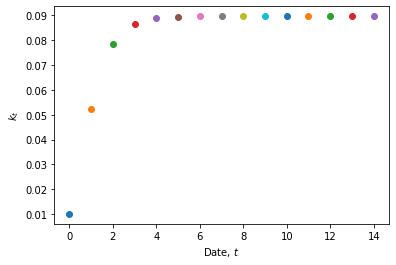

In [16]:
plot_aggregate_path(results)

## RCE path of $w_t$

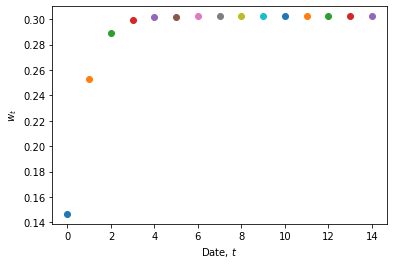

In [17]:
plot_aggregate_path(results, variable_name="w", 
                             variable_label="$w_{t}$")

## RCE path of $R_t$

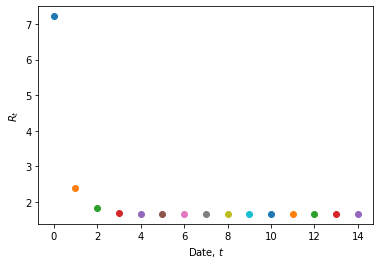

In [18]:
plot_aggregate_path(results, variable_name="R", 
                             variable_label="$R_{t}$")

## RCE path of $\overline{l}_t$

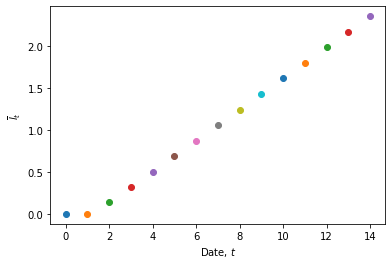

In [19]:
plt.figure()
for t in range(T):
    plt.plot(t, results[t]["distro_logh"]["lbar"], 'o')
plt.xlabel("Date, $t$")
plt.ylabel("$\overline{l}_{t}$")
plt.show()

## RCE path of $H_t$

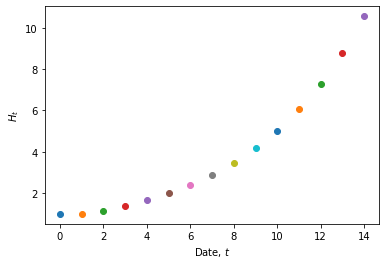

In [20]:
plt.figure()
for t in range(T):
    plt.plot(t, results[t]["distro_h"]["mean"], 'o')
plt.xlabel("Date, $t$")
plt.ylabel("$H_{t}$")
plt.show()

## RCE path of $\mu_{t}$ and $M_{t}$

The next function ``plot_dist`` plots a date-$t$ density function (either from the unique Normal distribution over functions of log-human-capital, or, from the implied log-Normal distribution of the corresponding variable).



In [21]:
def plot_dist(t, results, 
                 dist_name, 
                 dist_class="lognormal"):
    """dist_name is dictionary key defined in out
    in the function distro_log2level() above"""
    # Get current date-t distribution object
    if dist_class == "lognormal":
        dist = results[t]['distro_h'][dist_name]
    elif dist_class == "normal":
        dist = results[t]['distro_logh'][dist_name]
    # Auto-set intervals containing 99.999% of distro mass
    a, b = dist.interval(0.99999)
    # Generate 2D plot
    x=np.linspace(a, b, 100)
    plt.plot(x, dist.pdf(x), label=str("$t$ = ") + str(t))

The next function ``plot_dist_sequence`` uses the last function ``plot_dist`` to do repeated plots of densities at different dates.

You must consult the earlier function ``distro_log2level`` for how to:

* input the correct string name for ``dist_name``:
    * ``"distribution"`` (for either ``dist_class`` equalling ``"normal"`` or ``"lognormal"``)
    * ``"distribution_wealth"`` (for ``dist_class`` equalling ``"lognormal"`` only)
    * ``"distribution_capincome"`` (for ``dist_class`` equalling ``"lognormal"`` only)
    * ``"distribution_wage_income"`` (for ``dist_class`` equalling ``"lognormal"`` only)

You can name the figure $x$-axis label through the string input ``dist_label``

In [22]:
def plot_dist_sequence(results, dist_name, 
                                dist_label, 
                                dist_class="lognormal", 
                                skip=4):
    """dist_name is key defined in distro_log2level() above
       dist_label is string created by user for xlabel()"""
    T = len(results)
    plt.figure()
    for t in range(0, T, skip):
        plot_dist(t, results, dist_name, dist_class)
    plt.legend()
    plt.xlabel(dist_label)
    plt.ylabel("Percent")
    plt.show()

Let's look at a few snapshots of the probability density functions $\mu_{t}^{\prime}$, at different dates (cohorts of families) $t$:

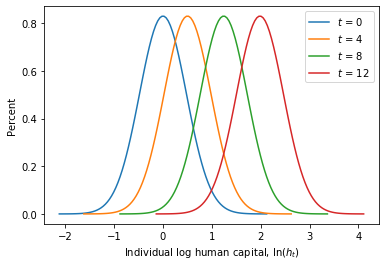

In [23]:
plot_dist_sequence(results, "distribution", 
                             dist_class="normal",
                             dist_label="Individual log human capital, $\ln (h_{t})$",
                             skip=4)

Let's look at a few snapshots of the probability density function of $h_{t}$, $M_{t}^{\prime}$, at different dates (cohorts of families) $t$:

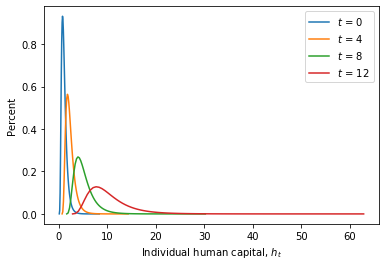

In [24]:
plot_dist_sequence(results, "distribution", 
                             dist_class="lognormal",
                             dist_label="Individual human capital, $h_{t}$",
                             skip=4)

**Notes**. 

* While $k_{t} = K_{t}/H_{t}$ converges to a constant along a steady-state equilibrium path, per-person capital $K_{t}$ will still be growing. In fact, it is growing at the same rate as $H_{t}$ in the long run.

* So there is perpetual growth in living standard, i.e., per-person output $Y_{t} = f(k_{t})\times H_{t}$

* There is also perpetual dispersion (inequality) in wealth and income, even if the mean of wealth and income are rising over time (generational cohorts).



Wealth and income are functions of aggregate prices $(w_{t}, R_{t+1})$ and $h_{t}$.

(See agent's optimal saving function and definition of labor and capital incomes.)

Se we can also plot the distributions of wealth, capital income and labor income of individuals at each cohort/date $t$.

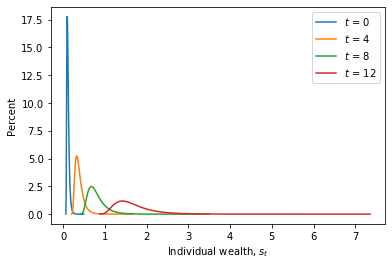

In [25]:
plot_dist_sequence(results, "distribution_wealth", 
                             dist_class="lognormal",
                             dist_label="Individual wealth, $s_{t}$",
                             skip=4)

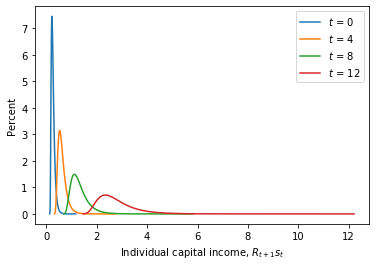

In [26]:
plot_dist_sequence(results, "distribution_capincome", 
                             dist_class="lognormal",
                             dist_label="Individual capital income, $R_{t+1}s_{t}$",
                             skip=4)

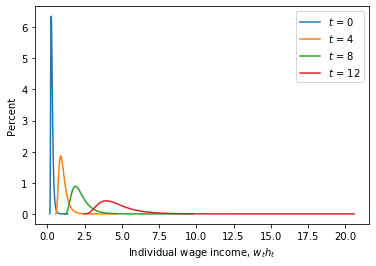

In [27]:
plot_dist_sequence(results, "distribution_wageincome", 
                             dist_class="lognormal",
                             dist_label="Individual wage income, $w_{t}h_{t}$",
                             skip=4)

# PUNCHLINE I: Wealth/talent begets wealth/talent

## Incentives and mechanism of inequality

What explains dynamics of income/wealth distributions here? 

* (Young) agents, regardless of their $h_{t}$ outcome, have

    * **constant** *marginal propensity to save* for their old age 
    
    * **constant** *marginal propensity to spend on child's education* 

* So then it's not differences in $mps$ and $mpe$ that's driving inequality.



**Individual histories matter!** ... So what is generating inequality here?

* It's the level of initial wealth (via initial human capital) of families!

    * Higher (lower) human capital $h_{t}$ parent begets higher (lower) human capital $h_{t+1}$ children tommorrow
    
    * Additionally, a higher (lower) $h_{t}$ individual can afford "more" ("less") privately funded education $e_{t}$ which contributes to their children's $h_{t+1}$. 



* So here, the level of initial wealth is driving the intertemporal/intergenerational immobility across the wealth distribution: 

    * the rich (poor) generate a persistent/perpetual dynasty of the rich (poor). 
    
* So in the aggregate there is a long run persistence of inequality - i.e., dispersion of wealth.

    * Since there is perpetual endogenous growth $\bar{l}_{t+1}-\bar{l}_{t} >0$, the right-skewness of the log-Normal distribution $M_{t}$ increases with $\bar{l}_{t}$ through its mean.

# EDUCATION AS A PUBLIC GOOD

## Case 2. Public provision of education

* Can public policy intervene?

* What if education is not privately provided (i.e., not purchased with private/parents' resources) ?

* What if society agrees to have a tax-and-redistribute policy?

    * Tax (labor) income and provide a common level of education
    
* What is the consequence for economic growth in the long run?

* What is the consequence for inequality of wealth and incomes?

Now, $e_{t}$ is now financed through taxation of aggregate wage income. The <a id='gbc'>government budget constraint</a> is:

\begin{equation}
e_{t} = \tau_{t}w_{t}H_{t}.
\label{eq: OLG tax on wage income}
\end{equation}

**Note:** Education $e_{t}$ is no longer a private choice variable 

* So the young agent's budget constraint becomes

    \begin{equation}
    c_{t} + s_{t} = (1-\tau_{t})w_t h_{t}.
    \label{eq: OLG young BC - tax}
    \end{equation}

Solving each young agent's decision problem, now we get their optimal savings function as

\begin{equation}
s_{t} = \left(\frac{\beta}{1+\beta}\right)(1-\tau_{t})w_{t}h_{t}.
\label{eq: OLG tax - saving}
\end{equation}

**Pause ... think ...**: 

* Compare this with the optimal savings function in the first regime without public policy. 
* What's different? Notice the missing $\gamma$ here? What did that parameter represent?

## How much public education to provide (i.e., tax)?

We have to determine the tax rate $\tau_{t}$ ...

Suppose we let all the young agents vote

* (We ignore the old agents for simplicity although in reality old voters are more active in voting! --- this can be generalized to the model)

Each $h_{t}$-type young agent knows, for given tax rate and wage rate, their *valuation over policy*, i.e., their *indirect utility* is

$$
\ln \left[(1-\tau_{t})w_{t}h_{t} - s_{t}\right] + \beta\ln (R_{t+1}s_{t}) + \gamma \ln (\tau_{t}w_{t}H_{t}).
$$

Plugging in agents' optimal saving function, and evaluating the logs utilities, we get each agent's valuation of any tax policy as:

$$
W(\tau_{t}|k_{t}, h_t, H_{t}) := (1+\beta)\ln(1-\tau_{t}) + \gamma \ln (\tau_{t}) + t.i.p.(k_{t}, h_t)
$$

where the aggregate terms independent of tax policy (t.i.p.) are:

$$
t.i.p.(k_{t}, h_t, H_{t}) := \ln \left[ \left(1 - \frac{\beta}{1+\beta}\right)w_{t}h_{t}\right] + \beta \ln\left(R_{t+1}\frac{\beta}{1+\beta}w_{t}h_{t}\right) + \gamma \ln (w_{t}H_{t})
$$



Thus, each household, regardless of their heterogeneity $h_{t}$, will have an identical most-preferred tax rate, 

$$
\tau^{\ast} = \arg \max_{\tau_{t}} W(\tau_{t}|k_{t})
$$

This maximizer is

$$
\tau_{t} = \tau^{\ast} \equiv \frac{\gamma}{1+\beta + \gamma} \in (0,1).
$$

### Pause ... and think ...

* We have just shown than regardless of type $h_{t}$, all agents prefer the same tax rate. 

* Thus a median voter would too. Hence a voting-game equilibrium must also yield $\tau_{t} \equiv \tau^{\ast} = \frac{\gamma}{1+\beta + \gamma}$.

* In short, a selfish voter would agree with all other voters in how to implement the policy. (A unanimous vote.)

* In general the voting problem is not so simple! (Here: this is an artefact of the all-log utility function assumed.)

## Consequence for distribution of wealth/income



### Evolution of individual human capital (wealth)

Combine voting equilibrium $\tau_{t} \equiv \tau^{\ast} = \frac{\gamma}{1+\beta + \gamma}$ with the [government budget constraint](#gbc), and substitute into the [human capital production function](#evo_h), we get:

$$
h_{t+1} = \kappa w_{t}^{\theta}H_{t}^{\theta}h_{t}^{1-\theta}.
$$

Taking logs, and letting $l_{t} := \ln(h_{t})$, we have

$$
l_{t+1} = (1-\theta)l_{t} + \ln \left[\kappa \left( w_{t}H_{t}\right)^{\theta}\right].
\tag{$\star$}
\label{eq: evolution of log h - tax }
$$

This is a log-linear process that works well with our log-Normal distributional assumption.



So the mean and variance of log-human-capital evolve, respectively, as

$$
\bar{l}_{t+1} = (1-\theta)\bar{l}_{t} + \ln \left[\kappa \left( w_{t}H_{t}\right)^{\theta}\right],
\tag{$\maltese$}
\label{eq: evolution of mean of log h - tax }
$$

and,

$$
\sigma_{t+1}^{2} = (1-\theta)^{2}\sigma_{t}^{2},
\tag{$\star\star$}
\label{eq: evolution of variance of log h - tax}
$$
given $\sigma_0 > 0$.

The evolution of the aggregate distribution of log human capital (under the public policy) is

$$
\mu_{t+1}^{\tau^{\ast}}(\ell) = \mu_{t}^{\tau^{\ast}}\left(\frac{\ell - \ln \left[\kappa \left( w_{t}H_{t}\right)^{\theta}\right]}{(1-\theta)}\right)
$$

Again, we may assume $\mu_{t}^{\tau^{\ast}} \equiv \mathcal{N}\left(\bar{l}_{t}, \sigma_{t}^{2}\right)$.

### An analytical insight on inequality
    
* We can already deduce that with public funding, the long run distribution of wealth is degenerate

* That is, under public education, the distribution of human capital, and hence wealth, will collapse to a single point mass (everyone becomes equal in the long run)

    * Since $(1-\theta)^{2} \in (0,1)$, even if $\sigma_{0} > 0$, we have
    
        $$\lim_{t \rightarrow \infty}\sigma_{t}^{2} = \lim_{t \rightarrow \infty}[(1-\theta)^{2}]^{t}\sigma_{0}^{2} = 0
        $$
        
* Here: an extreme example of what we saw in Empirical Observation 2!

After some algebra, we can show that the equilibrium process for aggregate capital per-efficiency units of workers (i.e., living standard) obeys the recursive function:

$$
k_{t+1} = \left[ \frac{\beta (1-\alpha)}{1+\beta +\gamma}\right](k_{t})^{\alpha}\left(\frac{H_{t+1}}{H_{t}}\right)^{-1}.
\tag{$\ast$}
\label{eq: evolution of log k - tax}
$$

But now, compared to the private funding of education case, this dynamic here is complicated by the growth in average human capital.

The latter depends on the dynamics of the distribution of individual human capital ...

Describing the competitive equilibrium is a bit more complicated now ...

* The average human capital $H_{t}$ complicates the dynamics of individual human capital production

* The aggregate distribution $\mu_{t}^{\tau^{\ast}}$ is also dependent of $H_t$, but $H_{t}$ also depend on $\mu_{t}^{\tau^{\ast}}$

* We'll just have to jointly solve for these objects as part of the equilibrium

* With more mathematical analysis  can show that ($\ast$) is still a monotone map with convergent sequence of $k_{t}$ and $H_{t}$ (but that's for more advanced study!)

* We'll instead compute an example equilbrium using the computer here!

## Recursive competitive equilibrium II



**DEFINITION**. Given initial conditions $k_0$ and $\mu_0 := \mathcal{N}\left(\bar{l}_0, \sigma_{0}\right)$, a *recursive competitive equilibrium* with *publicly funded education* is 

* an aggregate allocation $\{k_{t+1}, H_{t}\}_{t=0}^{\infty}$, 

* a sequence of human-capital distributions indexed by their mean and variance statistics $\{h_{t} \sim M_{t}^{\tau^{\ast}} := (\bar{l}_{t}, \sigma_{t})\}_{t=0}^{\infty}$, and, 

* a pricing system $\{ w_{t}, R_{t} \}_{t=0}^{\infty}$, 

such that for all $t \geq 0$:

1. $k_{t+1} = \left[ \frac{\beta (1-\alpha)}{1+\beta +\gamma}\right]Zk_{t}^{\alpha}\left(\frac{H_{t+1}}{H_{t}}\right)^{-1} \equiv g_{\tau^{\ast}}\left(k_t, \frac{H_{t+1}}{H_{t}}\right)$

2. $w_{t} =  (1-\alpha)Zk_{t}^{\alpha}$

3. $R_{t} =  \alpha Zk_{t}^{\alpha - 1}$

4. $\bar{l}_{t+1} = (1-\theta)\bar{l}_{t} + \ln \left[\kappa \left( w_{t}H_{t}\right)^{\theta}\right]$
			
5. $\sigma_{t+1}^{2} = (1-\theta)^{2}\sigma_{t}^{2}$



** *Note**: $M_{t}^{\tau^{\ast}}$ sufficiently described by

* Mean: 
    
    $$
    H_{t} := \mathbb{E}_{M_{t}^{\tau^{\ast}}}(h_t) = \int h_{t} \text{d}M_{t}^{\tau^{\ast}}(h_{t}) = \exp\left(\bar{l}_{t}+\frac{\sigma_{t}^{2}}{2}\right)
    $$ 

* Variance: 

    $$
    \text{var}(h_{t}) = \exp\left( 2\bar{l}_{t} + \sigma_{t}^{2}\right) \left[\exp\left(\sigma_{t}^{2}\right) - 1\right]
    $$

In [28]:
def g_tau(k, H, Hnext, parameters):
    """RCE map in k - public provision of education case
    under taxation rate $\tau^{\ast} = \gamma/(1+\beta+\gamma)$"""        
    # Extract specific parameters from dictionary
    A = parameters["A"]
    α = parameters["alpha"]
    β = parameters["beta"]
    γ = parameters["gamma"]
    θ = parameters["theta"]
    Z = parameters["Z"]  
    κ = parameters["kappa"]
    # Recursive competitive eqm map k --> g_public(k)
    knext = ((β)/(1+β+γ))*((1.0-α)*Z*(k**α))*(H/Hnext)
    return knext

In [29]:
def distro_logh_public(k, lbar, sigma2, parameters):
    """Recursion on Normal distribution for log-h 
                        - mean and variance"""
    θ = parameters["theta"]  
    κ = parameters["kappa"] 
    w = f(k, parameters)["w"]
    H = np.exp(lbar + sigma2/2.0)
    # Mean and variance of Normal dist. of log(h)
    lbar_next = (1.0-θ)*lbar + np.log(κ) + θ*np.log(w*H)
    sigma2_next = ((1.0-θ)**2.0)*sigma2
    Hnext = np.exp(lbar_next + sigma2_next/2.0)
    # Define Normal dist function at date t
    dist = norm(loc=lbar, scale=np.sqrt(sigma2))
    out = {"lbarnext" : lbar_next, 
           "sigma2next" : sigma2_next, 
           "lbar" : lbar, 
           "sigma2" : sigma2, 
           "H" : H,
           "Hnext" : Hnext,
           "distribution" : dist}
    return out

In [30]:
def distro_log2level_public(k, lbar, sigma2, parameters):
    """Public funding case:
       Transform unique Normal distribution of log-h 
       indexed by moments (lbar, sigma2) into
       implied log-Normal distribution M of level of h.
       Also calculate distribution of auxiliary 
       variables: labor income, capital income and wealth."""
    
    mean_h = np.exp(lbar + sigma2/2.0)
    var_h = np.exp(2.0*lbar + sigma2)*(np.exp(sigma2) - 1.0)
    # Define log-Normal dist function of h at date t
    mean_h = np.exp(lbar)
    dist = lognorm(s=np.sqrt(sigma2), loc=lbar, scale=mean_h) 
    
    # Aggregate prices
    w = f(k, parameters)["w"]
    lw = np.log(w)
    # Distribution of labor income
    mean_wage = np.exp(lbar+lw)
    dist_wageincome = lognorm(s=np.sqrt(sigma2), 
                                       loc=mean_wage,
                                       scale=mean_wage)
    
    # Distribution of Wealth
    β = parameters["beta"]
    γ = parameters["gamma"]
    τ = γ/(1.0+β+γ)
    constant = np.log(β*(1.0-τ)/(1+β))
    mean_wealth = np.exp(lbar+lw+constant)
    dist_wealth = lognorm(s=np.sqrt(sigma2), 
                                   loc=mean_wealth,
                                   scale=mean_wealth)
    
    # Distribution of capital income
    distout = distro_logh_public(k, lbar, sigma2, parameters)
    H, Hnext = distout["H"], distout["Hnext"]
    knext = g_tau(k, H, Hnext, parameters)
    Rnext = f(knext, parameters)["R"]
    lRnext = np.log(Rnext)
    mean_capincome = np.exp(lRnext+lbar+lw+constant)
    dist_capincome = lognorm(s=np.sqrt(sigma2), 
                                   loc=mean_capincome,
                                   scale=mean_capincome)
    
    # Store in out dictionary
    out = {"mean" : mean_h, 
           "variance" : var_h, 
           "distribution" : dist,
           "distribution_wageincome" : dist_wageincome,
           "distribution_wealth" : dist_wealth,
           "distribution_capincome" : dist_capincome,
          }
    return out

In [31]:
def G_public(k, lbar, sigma2, parameters):
    """Overall RCE system - private provision of education case
                          - see definition above"""
    # Distribution - Normal - log(h)
    distout_logh = distro_logh_public(k, lbar, sigma2, parameters)
    # Evolution of k = K/H
    H = distout_logh["H"]
    Hnext = distout_logh["Hnext"]
    knext = g_tau(k, H, Hnext, parameters)
    # Distribution - log-Normal - h
    distout_h = distro_log2level_public(k, lbar, sigma2, parameters)
    # Static relations - get values: y, R, w
    y, R, w = f(k, parameters).values()
    # Bento box
    out = {"k"           : k,
           "knext"       : knext, 
           "distro_logh" : distout_logh, 
           "distro_h"    : distout_h, 
           "y"           : y, 
           "R"           : R, 
           "w"           : w
          }
    return out

In [32]:
def sim_public(parameters, k, lbar=1.0, sigma2=0.25, T=15):
    """Simulate RCE outcomes given initial conditions"""
    results = []   
    for t in range(T):
        # Given date t states, store RCE outcome ...
        out = G_public(k, lbar, sigma2, parameters)
        results.append(out)
        # Update states for t+1 ...
        k = out["knext"]
        lbar = out["distro_logh"]["lbarnext"]
        sigma2 = out["distro_logh"]["sigma2next"]
    return results

In [33]:
# Simulate a RCE trajectory
T = 15
results_pub = sim_public(parameters, k=k0, lbar=0.0, sigma2=0.231, T=T)

## RCE path of $k = K/H$ under public education

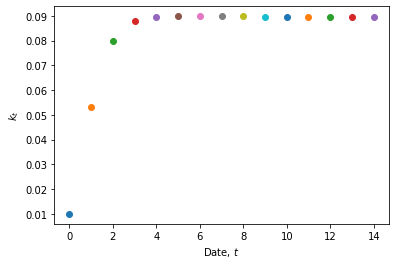

In [34]:
plot_aggregate_path(results_pub)

## RCE path of $w_t$ under public education

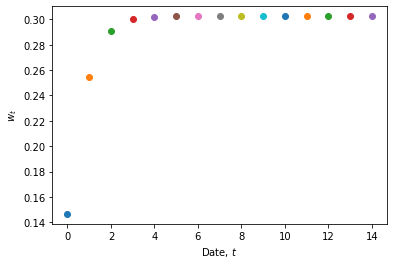

In [35]:
plot_aggregate_path(results_pub, variable_name="w", 
                             variable_label="$w_{t}$")

## RCE path of $R_t$ under public education

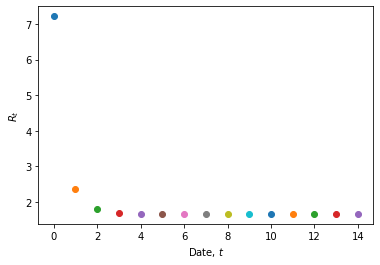

In [36]:
plot_aggregate_path(results_pub, variable_name="R", 
                             variable_label="$R_{t}$")

## RCE path of $\overline{l}_t$ under public education

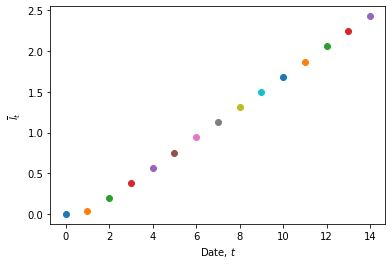

In [37]:
plt.figure()
for t in range(T):
    plt.plot(t, results_pub[t]["distro_logh"]["lbar"], 'o')
plt.xlabel("Date, $t$")
plt.ylabel("$\overline{l}_{t}$")
plt.show()

## RCE path of $H_t$ under public education

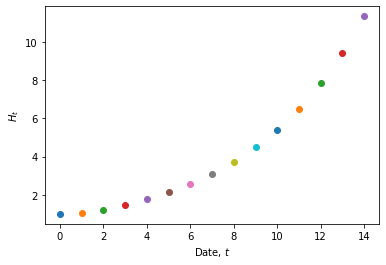

In [38]:
plt.figure()
for t in range(T):
    plt.plot(t, results_pub[t]["distro_h"]["mean"], 'o')
plt.xlabel("Date, $t$")
plt.ylabel("$H_{t}$")
plt.show()

## RCE path of $\mu_{t}$ and $M_{t}$ under public education

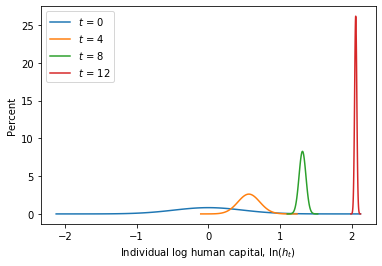

In [39]:
plot_dist_sequence(results_pub, "distribution", 
                             dist_class="normal",
                             dist_label="Individual log human capital, $\ln (h_{t})$",
                             skip=4)

Let's look at a few snapshots of the probability density function of $h_{t}$, $M_{t}^{\prime}$, at different dates (cohorts of families) $t$:

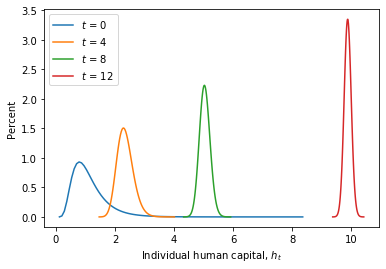

In [40]:
plot_dist_sequence(results_pub, "distribution", 
                             dist_class="lognormal",
                             dist_label="Individual human capital, $h_{t}$",
                             skip=4)

**Notes**. 


* While $k_{t} = K_{t}/H_{t}$ converges to a constant along a steady-state equilibrium path, per-person capital $K_{t}$ will eventually grow at the same rate as $H_{t}$ in the long run.

* In contrast to the laissez-faire economy, now with public financing of education there is no inequality in the long run. 

* We can prove that there is perpetual growth in living standard (per-capita income) in the long run. This is the same rate as that in the long run economy under private education!

Wealth and income are functions of aggregate prices $(w_{t}, R_{t+1})$ and $h_{t}$.

(See agent's optimal saving function and definition of labor and capital incomes.)

Se we can also plot the distributions of wealth, capital income and labor income of invidivuals at each cohort/date $t$.

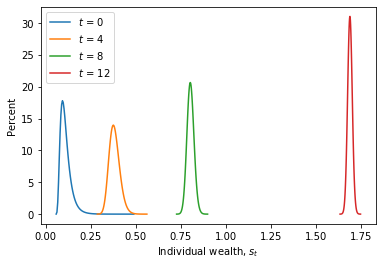

In [41]:
plot_dist_sequence(results_pub, "distribution_wealth", 
                             dist_class="lognormal",
                             dist_label="Individual wealth, $s_{t}$",
                             skip=4)

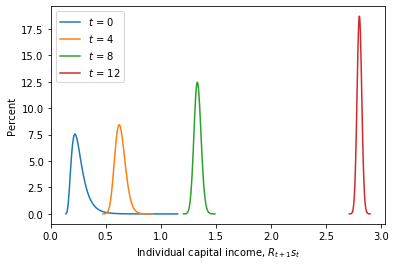

In [42]:
plot_dist_sequence(results_pub, "distribution_capincome", 
                             dist_class="lognormal",
                             dist_label="Individual capital income, $R_{t+1}s_{t}$",
                             skip=4)

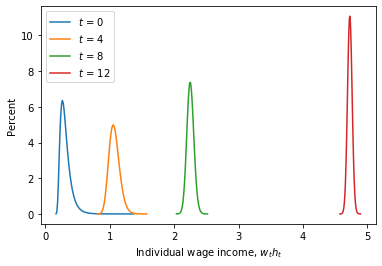

In [43]:
plot_dist_sequence(results_pub, "distribution_wageincome", 
                             dist_class="lognormal",
                             dist_label="Individual wage income, $w_{t}h_{t}$",
                             skip=4)

# PUNCHLINE II: Taxation and public education reduces inequality

### Pause ... and think ... Inequality vs. Growth trade-off

* Since $(\maltese)$ and $(\star\star)$ induce convergent sequences $\bar{l}_{t} \rightarrow \bar{l}$ and $\sigma_{t} \rightarrow 0$, we can deduce that public financing of education here eliminates dispersion in individual human capital completely. 

* As a result wealth, labor and capital income inequality also disappears completely in the long run. However there is no perpetual aggregate growth since $H_{t}$ converges to a constant in the long run.

* This contrasts with the self-funded case where there is perpetual inequality in these measures, but as a trade-off, there is perpetual growth in $H_{t}$, and thus living standard $K_{t}$ (per-person capital stock).




* So what's going on here? 

    * In the previous economy, the rich stay richer, the poor stay poorer. 
    
    * That is because the richer (poorer) households are self-providing a higher (lower) level of $e_{t}$. 
    
    * Combining that with a higher (lower) level of initial human capital of the parents, the children continue to be richer (poorer) in a relative sense. 
    
    * Note, at the margin, their investment rates are the same though!



* Now with public education, this here, is a story a politician like [Bernie Sanders would like](https://feelthebern.org/bernie-sanders-on-education/):
    * Take education out of private hands. 
    
    * Impose a higher burden of tax on the rich in terms of tax revenue/volume (although the marginal tax rate is the same). 
    
    * The poorer people bear a lower incidence of income tax. 
    
* The difference here is that everyone, rich or poor, gets the *same level of public education*. 

* As a result, the public policy helps generate intergenerational income and wealth mobility. The poor converge upward and the rich downward, toward a degenerate distribution of wealth and income.

* The difference here is that:

    * With public provision of education, regardless of income/wealth class, every child gets the *same* level of $e_{t}$
    
    * With private funding of education, each child's $e_{t}$ is *idiosyncratic*. It depends on the wealth (and thus income) of the parent.
    
        * The richer ones buy more $e_{t}$
        
        * The poorer ones have less $e_{t}$
       
* So in the private provision case, there is also distribution of $e_{t}$! That's part of the symptom why there is no reduction of inequality in that economic environment.

# Postscript - Exercise!

* Do you think reality is as stark as these two examples?

* Can public education alone close the income and wealth gap in reality?

    * If not, why not? What is potentially missing in these two  model stories?
    
    * How do your results above depend on $\theta$ (a measure of how effective the education system/investment is)?